# Approach

In [38]:

1) Once got the data started with Exploration of data : 
    a) shape of the data
    b) number of columns in the data
    c) data type of the data
    d) is there any missing value/ outlier in the data
        Findings: There is no missing and outlier in the data
    e) univariant & bivariant Analysis
 2) Visualization of the data : 
     a) various plots to understand the data :used boxplot , barplot , scatter plot, pairplot 
     b) Heap map (correlation):
         Findings: 
                 a)TimeMappingMatch and DifferentPredictedTime are highly negative correlated(-0.99)
                 b)DateMappingMatch and DifferentPredictedDate are highly negative correlated(-0.99)
 3) Divide the data into 70: 30 ration
 4) ML algorithms:
     a) Built base model for logistic regression ,RF and xgboost[default parameters]
     b) Used RandomSearch to fine tune the above models
     c) Used Cross validation on the above model to ensure model should not overfit
        

     
     

In [1]:
import pandas as pd
import numpy as np
##pd.set_option('max_row',1000)
    
from numpy import argmax
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report , auc,accuracy_score ,confusion_matrix,f1_score, precision_recall_curve,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve

from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix

import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [2]:
data = pd.read_csv(r'data_interview_test.csv',delimiter= ':')
data.head(10)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"10,000",10000,"10,468","10,006",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,"10,000",10000,"10,468","10,008",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,"10,000",10000,"10,468","10,009",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,"10,000",10000,"10,468","10,010",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,"10,000",10000,"10,468","10,011",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
print(data.shape)
data.columns

(12034, 14)


Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch'],
      dtype='object')

In [4]:
data['matched'] = data['matched_transaction_id']==data['feature_transaction_id']
data_visulaization = data
data['matched'] = data['matched'].astype('int')
print(data['matched'].value_counts())
print(data['matched'].value_counts(normalize=True))

data.head()

0    11177
1      857
Name: matched, dtype: int64
0    0.928785
1    0.071215
Name: matched, dtype: float64


,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,matched
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12034 entries, 0 to 12033
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   receipt_id               12034 non-null  object 
 1   company_id               12034 non-null  int64  
 2   matched_transaction_id   12034 non-null  object 
 3   feature_transaction_id   12034 non-null  object 
 4   DateMappingMatch         12034 non-null  float64
 5   AmountMappingMatch       12034 non-null  float64
 6   DescriptionMatch         12034 non-null  float64
 7   DifferentPredictedTime   12034 non-null  float64
 8   TimeMappingMatch         12034 non-null  float64
 9   PredictedNameMatch       12034 non-null  float64
 10  ShortNameMatch           12034 non-null  float64
 11  DifferentPredictedDate   12034 non-null  float64
 12  PredictedAmountMatch     12034 non-null  float64
 13  PredictedTimeCloseMatch  12034 non-null  float64
 14  matched               

In [6]:
data.describe()

,company_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,matched
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,27247.797906,0.217901,0.031660,0.021522,0.986455,0.013877,0.024215,0.037893,0.753532,0.001005,0.076533,0.071215
std,12024.542988,0.384535,0.122611,0.116995,0.115597,0.116987,0.128646,0.190945,0.430972,0.020134,0.265860,0.257194
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,50000.000000,1.000000,0.900000,0.800000,1.000000,1.000000,0.800000,1.000000,1.000000,0.600000,1.000000,1.000000


In [7]:
# Missing value
data.isnull().sum()

receipt_id                 0
company_id                 0
matched_transaction_id     0
feature_transaction_id     0
DateMappingMatch           0
AmountMappingMatch         0
DescriptionMatch           0
DifferentPredictedTime     0
TimeMappingMatch           0
PredictedNameMatch         0
ShortNameMatch             0
DifferentPredictedDate     0
PredictedAmountMatch       0
PredictedTimeCloseMatch    0
matched                    0
dtype: int64

# Exploration of data
##### a) univariant analysis
##### b) bivarant

In [8]:
import seaborn as sns
%matplotlib inline


In [9]:
data_visulaization = data_visulaization.drop(['receipt_id','company_id','matched_transaction_id','feature_transaction_id'],axis = 1)
data_visulaization['matched'] = data_visulaization['matched'].astype('object')

In [10]:
data_visulaization.columns

Index(['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch', 'matched'],
      dtype='object')

In [11]:
data_visulaization.iplot(kind='scatter',x='DateMappingMatch',y='AmountMappingMatch',mode='markers',size=10)

In [12]:
data_visulaization.iplot(kind='bar',x = "matched", y = 'DateMappingMatch',width=100)

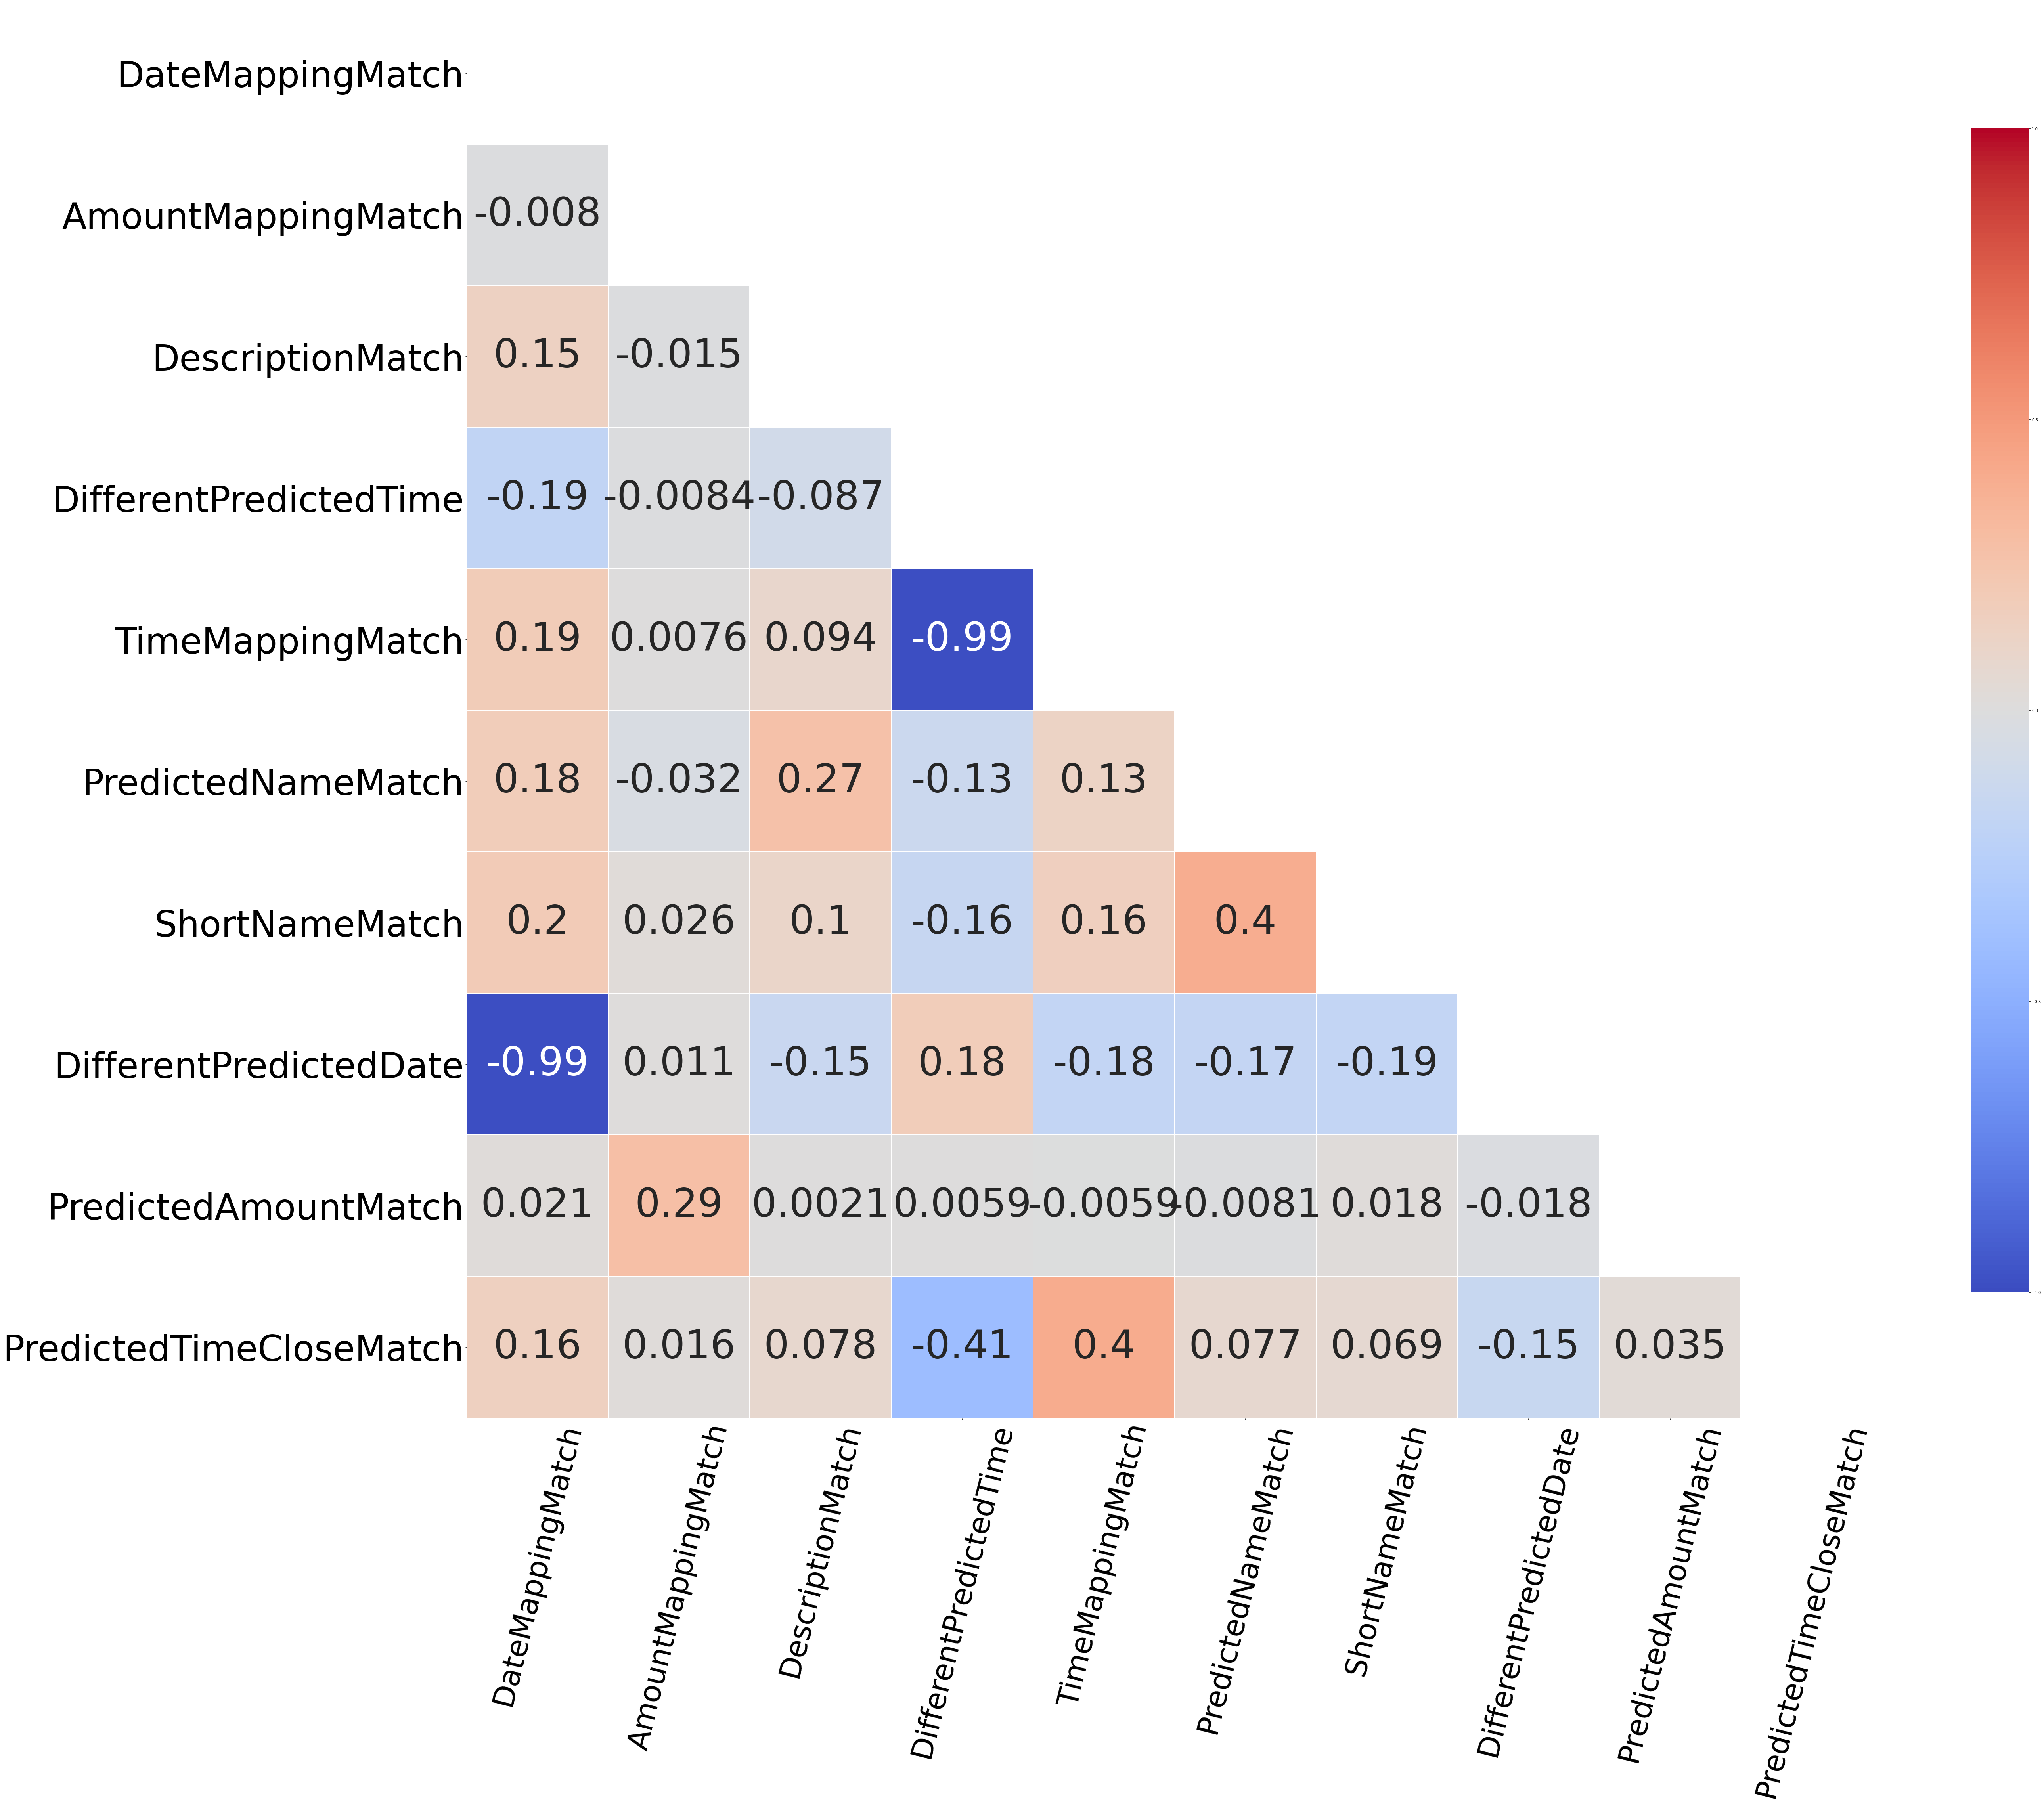

In [13]:
# Correlation

corr = data_visulaization.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .9,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 100})
# Add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0,fontsize = 90)
ax.set_xticklabels(corr.columns,fontsize=75,rotation = 76)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});
f.set_size_inches(80,90)


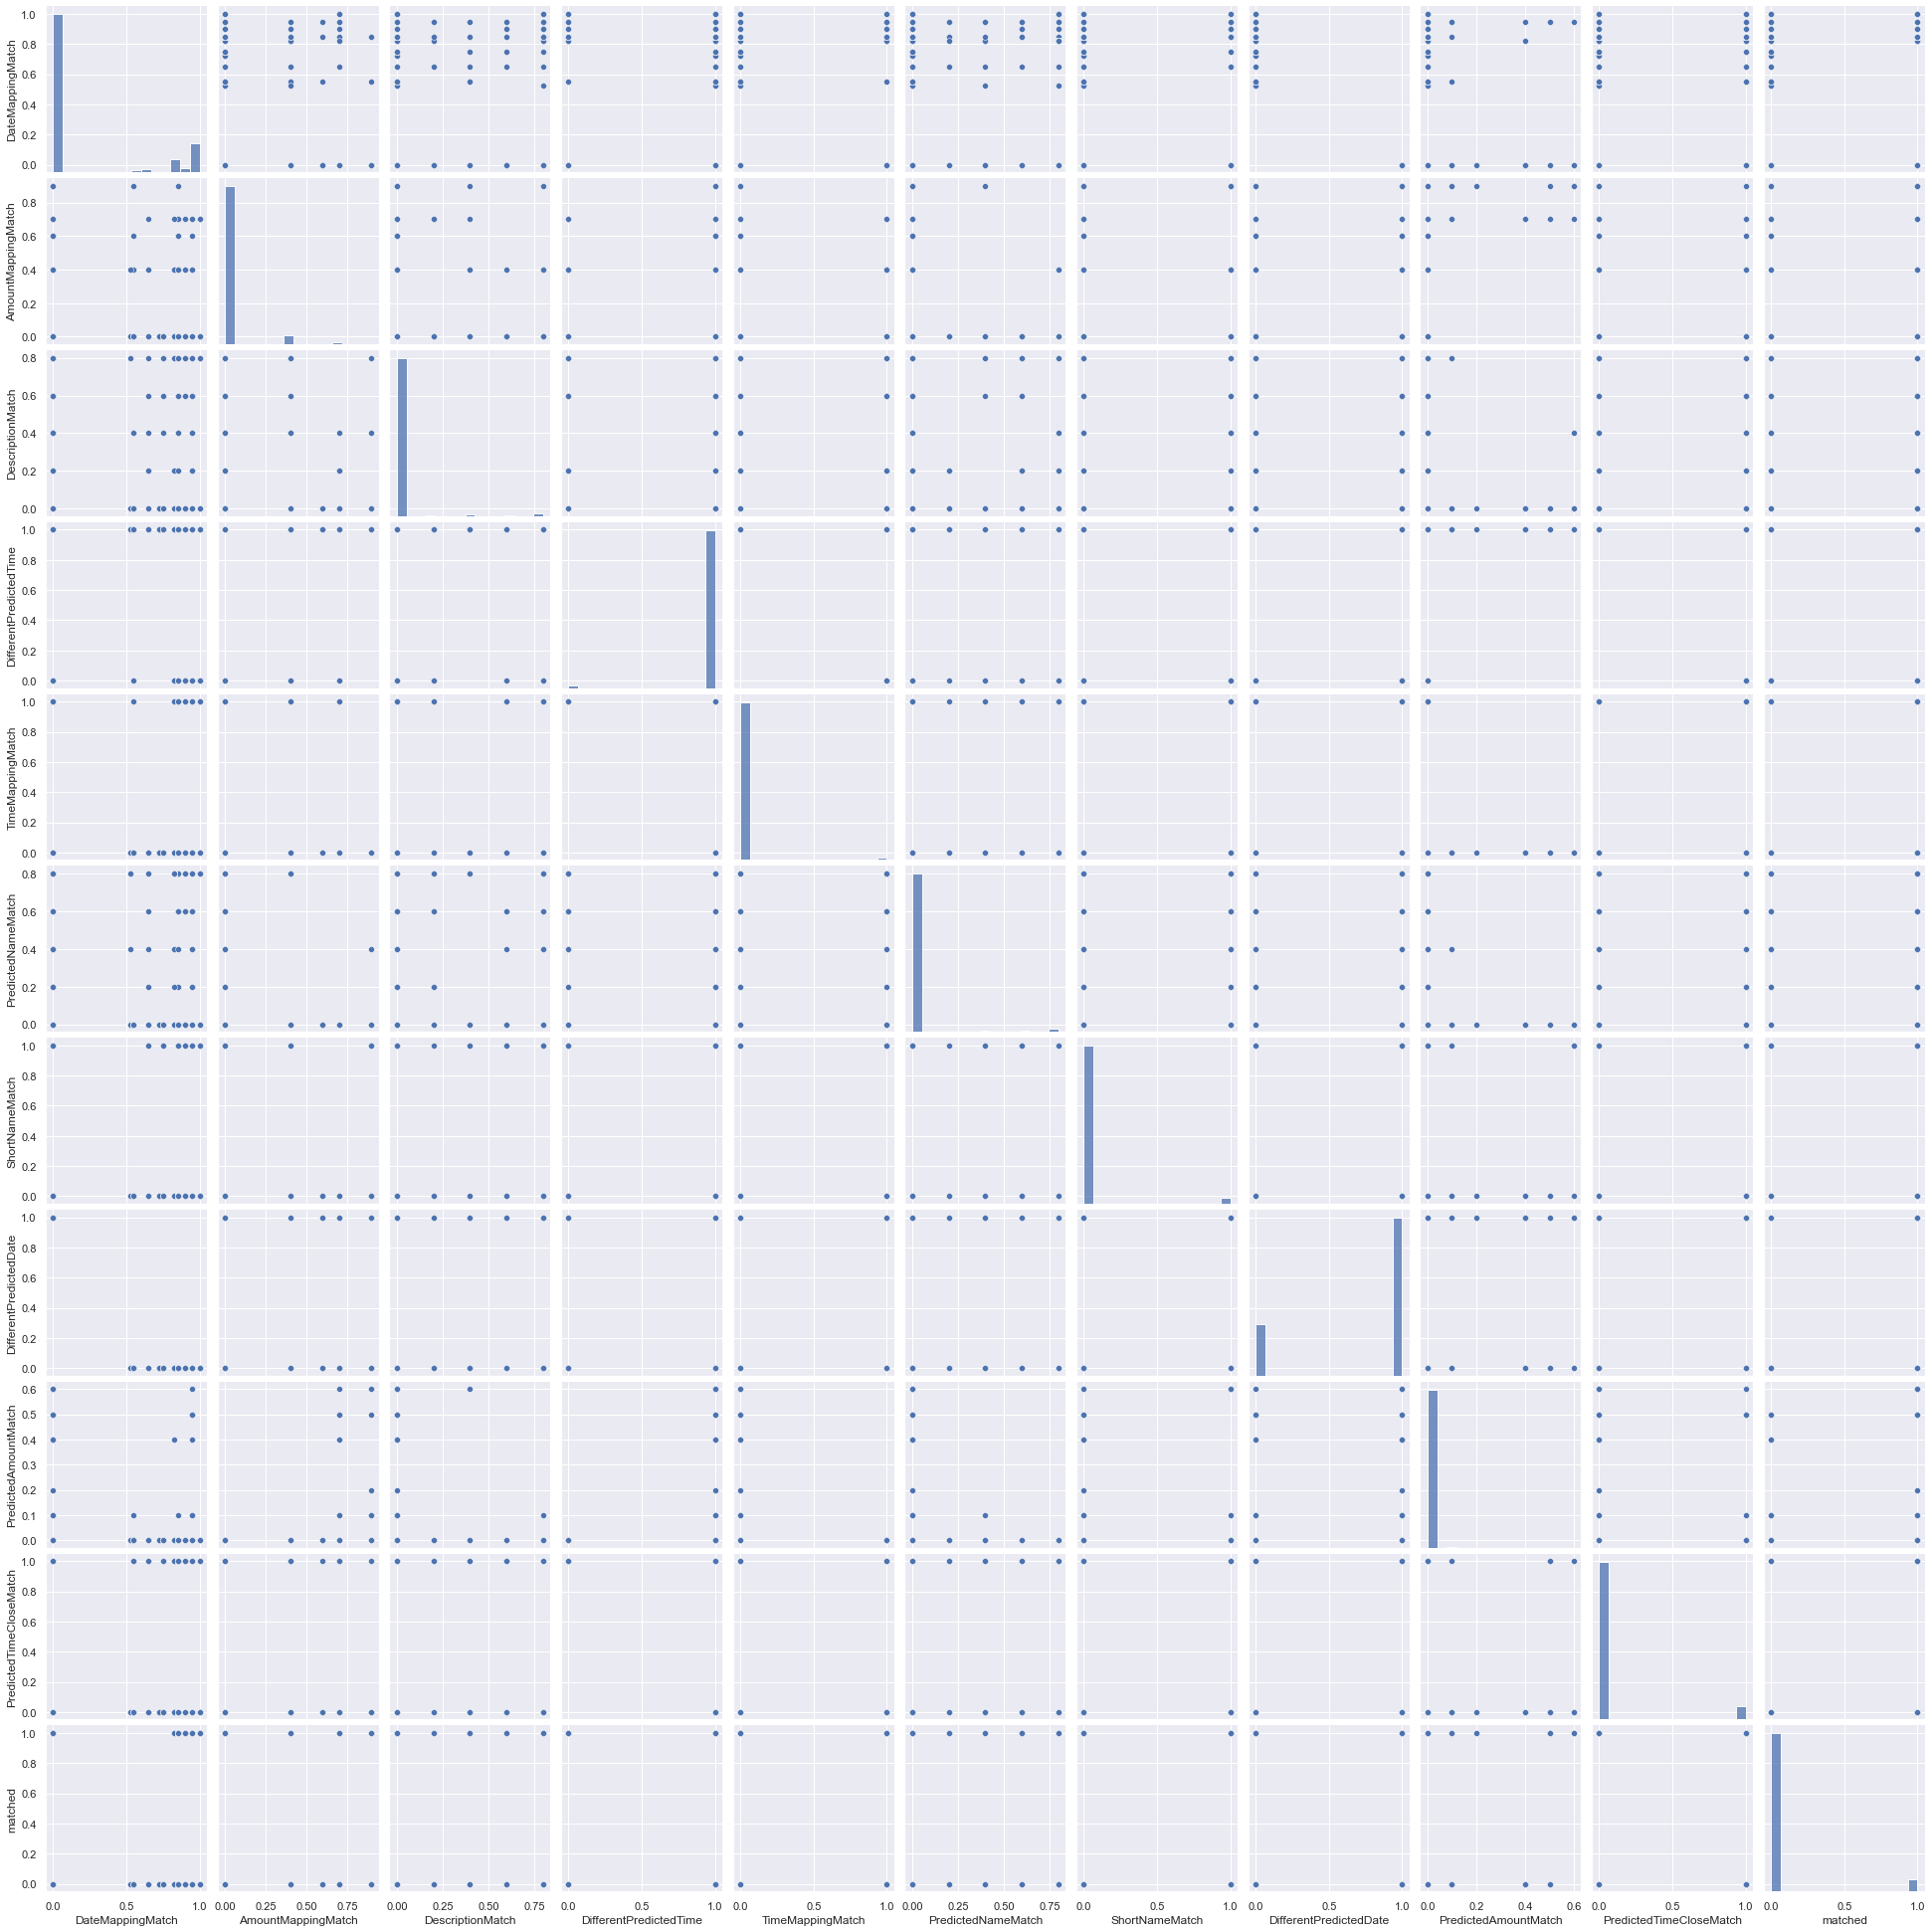

In [14]:
sns.set()
sns.pairplot(data_visulaization , kind= 'scatter')

<AxesSubplot:xlabel='DateMappingMatch', ylabel='DifferentPredictedDate'>

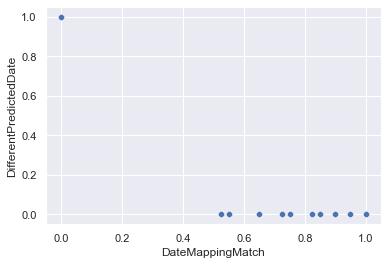

In [15]:
sns.scatterplot(y = data_visulaization['DifferentPredictedDate'],x = data_visulaization['DateMappingMatch']  )

<AxesSubplot:xlabel='matched', ylabel='DateMappingMatch'>

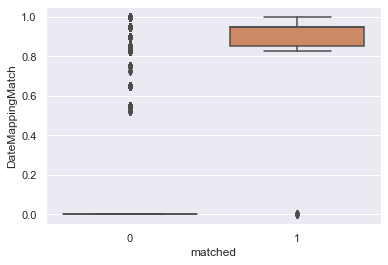

In [16]:
sns.boxplot(x = 'matched' , y = 'DateMappingMatch' ,data = data_visulaization )

(array([1.1225e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1500e+02,
        0.0000e+00, 2.6000e+01, 1.5900e+02, 0.0000e+00, 9.0000e+00]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ]),
 <BarContainer object of 10 artists>)

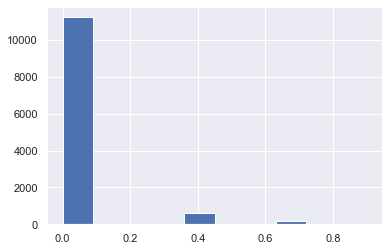

In [17]:
plt.hist(data_visulaization['AmountMappingMatch'])

In [18]:
data_visulaization.columns

Index(['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch', 'matched'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

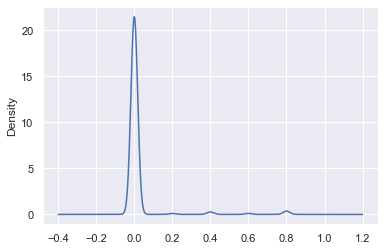

In [19]:
# density plot
data_visulaization.DescriptionMatch.plot(kind= 'density')

In [20]:
data_visulaization.columns

Index(['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch', 'matched'],
      dtype='object')

In [21]:
df3 = data_visulaization[['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch']]
df3.iplot(kind='surface',colorscale='rdylbu')

In [22]:
# Remove no use variables
data1 = data.drop(['receipt_id','company_id','matched_transaction_id','feature_transaction_id'],axis = 1)

y = data1['matched']
X = data1.drop(columns = ['matched'],axis = 1)

train_x , test_x , train_y , test_y = train_test_split(X, y , test_size=0.3 ,random_state=42, stratify= y)

print(f'train_x=',train_x.shape)
print(f'train_y=',train_y.shape)
print(f'test_x=',test_x.shape)
print(f'test_y=',test_y.shape)

train_x= (8423, 10)
train_y= (8423,)
test_x= (3611, 10)
test_y= (3611,)


In [23]:
def best_threshold_calculation(test_y , prob_lr_y , pred_lr_y):
    lr_precision, lr_recall , threshold = precision_recall_curve(test_y , prob_lr_y)
    fscore = (2*lr_precision*lr_recall)/(lr_precision + lr_recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    lr_f1, lr_auc = f1_score(test_y , pred_lr_y), auc(lr_recall, lr_precision)
    # summarize scores
    print('Best Threshold=%f, F-Score=%.3f' % (threshold[ix], fscore[ix]))
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(test_y[test_y==1]) / len(test_y)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return threshold[ix]

Best Threshold=0.332002, F-Score=0.671


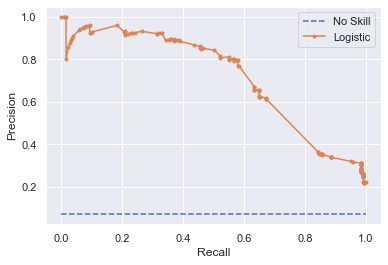

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.80      0.58      0.67       257

    accuracy                           0.96      3611
   macro avg       0.88      0.78      0.82      3611
weighted avg       0.96      0.96      0.96      3611



In [24]:
lr = LogisticRegression(random_state=42)
lr.fit(train_x,train_y)
pred_lr_y = lr.predict(test_x)
prob_lr_y = lr.predict_proba(test_x)
prob_lr_y  = prob_lr_y[:, 1]
#print(classification_report(test_y , pred_lr_y))
#print(f1_score(test_y , pred_lr_y))
best_threshold = best_threshold_calculation(test_y , prob_lr_y , pred_lr_y)

pred_lr_y = [1 if i > best_threshold  else 0 for i in prob_lr_y ]
print(classification_report(test_y , pred_lr_y))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.88      0.56      0.68       257

    accuracy                           0.96      3611
   macro avg       0.92      0.78      0.83      3611
weighted avg       0.96      0.96      0.96      3611

[[3334   20]
 [ 113  144]]
0.684085510688836
Best Threshold=0.319033, F-Score=0.699


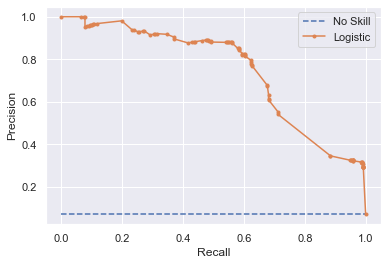

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.82      0.60      0.69       257

    accuracy                           0.96      3611
   macro avg       0.89      0.80      0.84      3611
weighted avg       0.96      0.96      0.96      3611



In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x,train_y)
predict_rf_y = rf.predict(test_x)
prob_rf_y = rf.predict_proba(test_x)
prob_rf_y = prob_rf_y[:,1]
print(classification_report(test_y , predict_rf_y))
print(confusion_matrix(test_y , predict_rf_y))
print(f1_score(test_y , predict_rf_y))

best_rf_threshold = best_threshold_calculation(test_y , prob_rf_y ,predict_rf_y)
predict_rf_y = [1 if i > best_rf_threshold  else 0 for i in prob_rf_y ]
print(classification_report(test_y , predict_rf_y))

[00:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.85      0.57      0.68       257

    accuracy                           0.96      3611
   macro avg       0.91      0.78      0.83      3611
weighted avg       0.96      0.96      0.96      3611



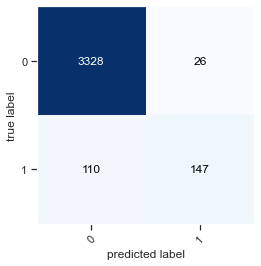

0.6837209302325581

 ============ model after finding best threshold ================

Best Threshold=0.313129, F-Score=0.696


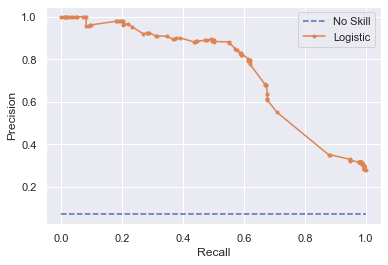

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.82      0.60      0.69       257

    accuracy                           0.96      3611
   macro avg       0.90      0.79      0.84      3611
weighted avg       0.96      0.96      0.96      3611



In [26]:

xg = XGBClassifier(random_state =42)

xg.fit(train_x,train_y)
predict_xg_y = xg.predict(test_x)
prob_xg_y = xg.predict_proba(test_x)
prob_xg_y = prob_xg_y[:,1]
print(classification_report(test_y , predict_xg_y ))
cf = confusion_matrix(test_y , predict_xg_y )
fig, ax = plot_confusion_matrix(conf_mat = cf,
                               class_names = ['0','1'],
                               #show_normed = True,
                                 cmap=plt.cm.Blues
                                 )
#plt.title('Confusion matrix for our classifier')
#f = plt.show(matrix)
plt.show()
print(f1_score(test_y , predict_xg_y ))
print("\n ============ model after finding best threshold ================\n")
best_xg_threshold = best_threshold_calculation(test_y , prob_xg_y ,predict_xg_y)
predict_xg_y  = [1 if i > best_xg_threshold  else 0 for i in prob_xg_y ]
print(classification_report(test_y , predict_xg_y ))

# cross validation
##### a) Linear Regression
##### b) RandomForest
##### c) Xgboost


In [28]:

def stratifies_k_fold(X,y,model):
    accuracy =[]
    precision =[]
    recall =[]
    f1  =[]
    skf = StratifiedKFold(n_splits= 7,random_state=42,shuffle=True)
    for train_index , test_index in skf.split(X,y):
        #print("Train:",train_index ,"Test:",test_index)
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train , y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        pred_y = model.predict(X_test)
        #print(classification_report(y_test , pred_lr_y))
        accuracy.append(accuracy_score(y_true=y_test, y_pred=pred_y))
        precision.append(precision_score(y_true=y_test, y_pred=pred_y))
        recall.append(recall_score(y_true=y_test, y_pred=pred_y))
        f1.append(f1_score(y_true=y_test, y_pred=pred_y))
        #print(confusion_matrix(y_true=y_test, y_pred=pred_y))
    return accuracy , precision , recall, f1

In [29]:
# cross validation RF
accuracy =[]
precision =[]
recall =[]
f1  =[]
#rf1 = RandomForestClassifier(random_state=42,n_estimators=100,
#                             min_samples_split=10, min_samples_leaf=4,
#                             max_features='auto', max_depth = 7, bootstrap= True)
rf1 = RandomForestClassifier(random_state=42)
accuracy , precision , recall, f1 = stratifies_k_fold(X,y,rf1)
print(f"accuracy = {np.mean(accuracy)},\n precision ={np.mean(precision)},\n recall={np.mean(recall)} , \nf1={np.mean(f1)}")

accuracy = 0.9618584744665349,
 precision =0.8411364497962589,
 recall=0.5741322518611602 , 
f1=0.6820441442959982


In [30]:
# cross validation xgboost
accuracy =[]
precision =[]
recall =[]
f1  =[]
xg1 = XGBClassifier(random_state=42)
accuracy , precision , recall, f1 = stratifies_k_fold(X,y,xg1)
print(f"accuracy = {np.mean(accuracy)},\n precision ={np.mean(precision)},\n recall={np.mean(recall)} , \nf1={np.mean(f1)}")

[00:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Hyper paramter tuning - Logistic , RF & Xgboost

In [31]:
# define evaluation Logistic Regression


cv  = StratifiedKFold(n_splits= 7,random_state=42,shuffle=True)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
model =  LogisticRegression(random_state=42)
search = RandomizedSearchCV(model, space, n_iter=100, scoring='f1', n_jobs=-1, cv=cv, random_state=42)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6334608463209631
Best Hyperparameters: {'C': 6.7977373780145545, 'penalty': 'l2', 'solver': 'lbfgs'}


In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

cv  = StratifiedKFold(n_splits= 10,random_state=42,shuffle=True)
# define search space
# define search
model = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(model, random_grid, n_iter=100, scoring='f1', n_jobs=-1, cv=cv, random_state=42)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6833090458598183
Best Hyperparameters: {'n_estimators': 57, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


# Best Model - Random Forest

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.88      0.56      0.68       257

    accuracy                           0.96      3611
   macro avg       0.92      0.78      0.83      3611
weighted avg       0.96      0.96      0.96      3611

[[3334   20]
 [ 113  144]]
0.684085510688836
Best Threshold=0.319033, F-Score=0.699


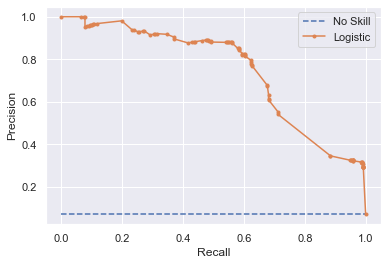

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3354
           1       0.82      0.60      0.69       257

    accuracy                           0.96      3611
   macro avg       0.89      0.80      0.84      3611
weighted avg       0.96      0.96      0.96      3611



In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x,train_y)
predict_rf_y = rf.predict(test_x)
prob_rf_y = rf.predict_proba(test_x)
prob_rf_y = prob_rf_y[:,1]
print(classification_report(test_y , predict_rf_y))
print(confusion_matrix(test_y , predict_rf_y))
print(f1_score(test_y , predict_rf_y))

best_rf_threshold = best_threshold_calculation(test_y , prob_rf_y ,predict_rf_y)
predict_rf_y = [1 if i > best_rf_threshold  else 0 for i in prob_rf_y ]
print(classification_report(test_y , predict_rf_y))

In [34]:
lr_val_accu = accuracy_score(test_y , pred_lr_y )
lr_val_f1 = f1_score(test_y , pred_lr_y )
lr_val_recall  = recall_score(test_y , pred_lr_y)
lr_val_precision = precision_score(test_y , pred_lr_y)

rf_val_accu = accuracy_score(test_y , predict_rf_y)
rf_val_f1 = f1_score(test_y , predict_rf_y)
rf_val_recall  = recall_score(test_y , predict_rf_y)
rf_val_precision = precision_score(test_y , predict_rf_y)


xg_val_accu = accuracy_score(test_y , predict_xg_y )
xg_val_f1 = f1_score(test_y , predict_xg_y )
xg_val_recall  = recall_score(test_y , predict_xg_y )
xg_val_precision = precision_score(test_y , predict_xg_y )

accuracy_report = pd.DataFrame({'Classification Report':['Accuracy','F1-score','Recall','Precison'],
                                'Logistic Regression': [lr_val_accu , lr_val_f1 , lr_val_recall , lr_val_precision],
                                'Random Forest':[rf_val_accu , rf_val_f1 , rf_val_recall , rf_val_precision],
                                'Xgboost':[xg_val_accu , xg_val_f1 , xg_val_recall , xg_val_precision]})



accuracy_report

,Classification Report,Logistic Regression,Random Forest,Xgboost
0,Accuracy,0.959291,0.962060,0.962060
1,F1-score,0.668172,0.693512,0.690745
2,Recall,0.575875,0.603113,0.595331
3,Precison,0.795699,0.815789,0.822581


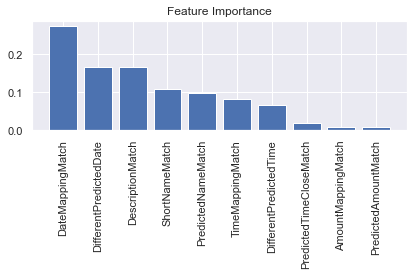

In [35]:
# Important variables using RF 
# get importance
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(train_x.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_x.shape[1]),train_x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Conclusion


In [ ]:
1) a)TimeMappingMatch and DifferentPredictedTime are highly negative correlated(-0.99)
   b)DateMappingMatch and DifferentPredictedDate are highly negative correlated(-0.99)
2) Random Forest with default hyperparameters fitting best in the given data [F1-score = 69.3%] than xgboost[F1-score = 69%] and logistic Regression[F1-score = 69%]


 

# Next Steps: 

1) Feature Engineering : Need to understand the meta data of the extracted feature for Feature Engineering
